# Relation between variables considering the distance to a large city

In [1]:
import pandas as pd
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import seaborn as sns

In [2]:
path = "\\".join(os.getcwd().split("\\")[:-1])
path

'C:\\Users\\Camila\\Documents\\git\\common_data'

In [3]:
# Importing the Excel file with all the cities
covid_munic = pd.read_csv(path + "\data\caso_full_with_indicators.csv")
covid_munic["date"] = pd.to_datetime(covid_munic['date'], format="%Y/%m/%d")
covid_munic.head(1)

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,...,T_DENS,AGUA_ESGOTO,T_RMAXIDOSO,IDHM,IDHM_E,IDHM_L,IDHM_R,distance_capital,distance_nearest_capital,distance_nearest_bigcity
0,Acrelândia,1200013.0,2020-06-22,26,15256.0,True,False,181,1186.41846,2020-06-22,...,41.61,23.82,2.54,0.604,0.466,0.808,0.584,102.9,102.9,102.9


In [4]:
print(covid_munic.columns)

Index(['city', 'city_ibge_code', 'date', 'epidemiological_week',
       'estimated_population_2019', 'is_last', 'is_repeated',
       'last_available_confirmed',
       'last_available_confirmed_per_100k_inhabitants', 'last_available_date',
       'last_available_death_rate', 'last_available_deaths', 'new_confirmed',
       'new_deaths', 'order_for_place', 'place_type', 'state', 'name',
       'latitude', 'longitude', 'Region', 'code_state', 'RAZDEP', 'GINI',
       'PIND', 'PMPOB', 'PPOB', 'RDPC', 'T_AGUA', 'T_BANAGUA', 'T_DENS',
       'AGUA_ESGOTO', 'T_RMAXIDOSO', 'IDHM', 'IDHM_E', 'IDHM_L', 'IDHM_R',
       'distance_capital', 'distance_nearest_capital',
       'distance_nearest_bigcity'],
      dtype='object')


In [5]:
covid_last_day = covid_munic[(covid_munic["date"] == max(covid_munic["date"]) - pd.DateOffset(1)) 
                             & (covid_munic["place_type"] == "city") & (covid_munic["city"] != 'Importados/Indefinidos' )]
covid_last_day.drop(['is_last', 'is_repeated', 'last_available_date', 'epidemiological_week'], axis = 1, inplace=True)
covid_last_day.head()

C:\Users\Camila\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,city,city_ibge_code,date,estimated_population_2019,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_death_rate,last_available_deaths,new_confirmed,new_deaths,...,T_DENS,AGUA_ESGOTO,T_RMAXIDOSO,IDHM,IDHM_E,IDHM_L,IDHM_R,distance_capital,distance_nearest_capital,distance_nearest_bigcity
4991,Acrelândia,1200013.0,2020-06-21,15256.0,181,1186.41846,0.0110,2,0,0,...,41.61,23.82,2.54,0.604,0.466,0.808,0.584,102.90,102.90,102.90
4992,Assis Brasil,1200054.0,2020-06-21,7417.0,139,1874.07308,0.0360,5,0,0,...,47.00,28.79,6.49,0.588,0.456,0.770,0.578,218.79,218.79,218.79
4993,Brasiléia,1200104.0,2020-06-21,26278.0,236,898.08966,0.0254,6,0,0,...,41.11,20.40,3.68,0.614,0.485,0.770,0.619,151.99,151.99,151.99
4994,Bujari,1200138.0,2020-06-21,10266.0,132,1285.79778,0.0076,1,4,0,...,50.25,23.51,4.83,0.589,0.439,0.772,0.603,22.81,22.81,22.81
4995,Capixaba,1200179.0,2020-06-21,11733.0,117,997.18742,0.0342,4,5,1,...,48.48,31.13,3.76,0.575,0.398,0.794,0.601,67.44,67.44,67.44


In [6]:
print(len(covid_last_day))
# covid_last_day[covid_last_day["distance_capital"] != covid_last_day["distance_nearest_capital"]].sort_values('city_ibge_code')

4930


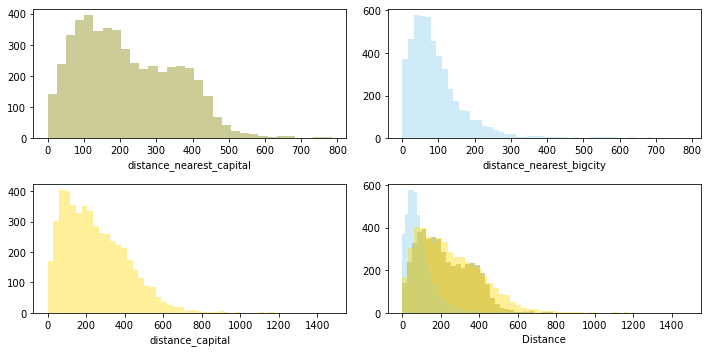

In [7]:
f, axes = plt.subplots(2, 2, figsize=(10, 5))
sns.distplot(covid_last_day["distance_nearest_capital"] , color="olive", kde = False, ax= axes[0, 0])
sns.distplot(covid_last_day["distance_nearest_bigcity"] , color="skyblue", kde = False, ax= axes[0, 1])
sns.distplot(covid_last_day["distance_capital"] , color="gold", kde = False, ax= axes[1, 0])

sns.distplot(covid_last_day["distance_nearest_capital"] , color="olive", kde = False, ax= axes[1, 1])
sns.distplot(covid_last_day["distance_nearest_bigcity"] , color="skyblue", kde = False, ax= axes[1, 1])
sns.distplot(covid_last_day["distance_capital"] , color="gold", kde = False, ax= axes[1, 1])
axes[1, 1].set_xlabel("Distance")

plt.tight_layout()
plt.show()

In [8]:
conditions = [
    (covid_last_day['estimated_population_2019'] > 150000),
    (covid_last_day['distance_nearest_bigcity'] < 50),
    (covid_last_day['distance_nearest_bigcity'] < 100),
    (covid_last_day['distance_nearest_bigcity'] < 200)]
choices = ['Cidade acima de 150.000', '50km- de uma cidade grande', '50-100km de uma cidade grande', '100-200km de uma cidade grande', ]

covid_last_day["City Type"] = np.select(conditions, choices, default='200km+ de uma cidade grande')
choices.append('200km+ de uma cidade grande')
covid_last_day["City Type"].value_counts()

C:\Users\Camila\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


50-100km de uma cidade grande     1643
50km- de uma cidade grande        1315
100-200km de uma cidade grande    1307
200km+ de uma cidade grande        465
Cidade acima de 150.000            200
Name: City Type, dtype: int64

In [9]:
covid_last_day_exc_capitals = covid_last_day[covid_last_day["distance_capital"] > 0]
len(covid_last_day_exc_capitals)

4903

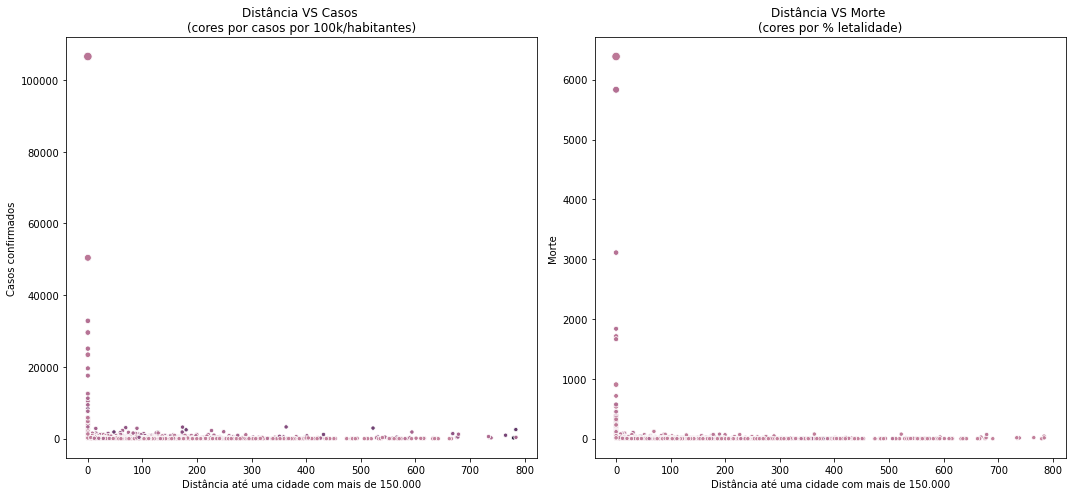

In [25]:
f, axes = plt.subplots(1, 2, figsize=(15, 7))
cmap = sns.cubehelix_palette(n_colors=50, dark=0, light=.6, as_cmap=True)

sns.scatterplot(data = covid_last_day, x = "distance_nearest_bigcity", y = "last_available_confirmed", 
                hue = "last_available_confirmed_per_100k_inhabitants", 
                size="estimated_population_2019", alpha=1, ax=axes[0], legend = False, palette=cmap)
sns.scatterplot(data = covid_last_day, x = "distance_nearest_bigcity", y = "last_available_deaths", 
                hue = "last_available_death_rate", 
                size="estimated_population_2019", alpha=1, ax=axes[1], legend = False, palette=cmap)

axes[0].set(ylabel="Casos confirmados", xlabel="Distância até uma cidade com mais de 150.000", 
            title="Distância VS Casos \n(cores por casos por 100k/habitantes)")
axes[1].set(ylabel="Morte", xlabel="Distância até uma cidade com mais de 150.000", 
            title="Distância VS Morte \n(cores por % letalidade)")

plt.tight_layout()
plt.show()

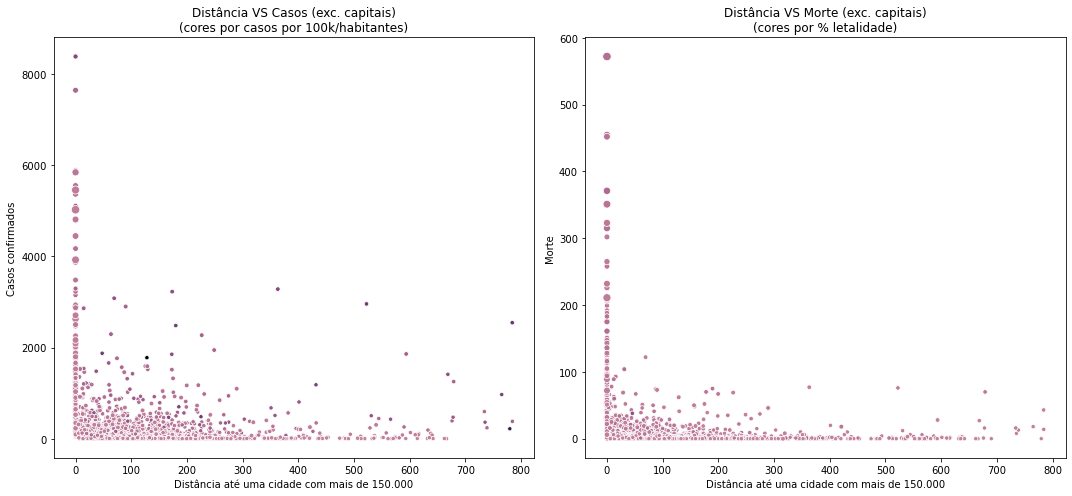

In [24]:
# Excluindo Capitais
f, axes = plt.subplots(1, 2, figsize=(15, 7))
cmap = sns.cubehelix_palette(n_colors=50, dark=0, light=.6, as_cmap=True)

sns.scatterplot(data = covid_last_day_exc_capitals, x = "distance_nearest_bigcity", y = "last_available_confirmed", 
                hue = "last_available_confirmed_per_100k_inhabitants", size="estimated_population_2019", 
                alpha=1, ax=axes[0], legend = False, palette=cmap)
sns.scatterplot(data = covid_last_day_exc_capitals, x = "distance_nearest_bigcity", y = "last_available_deaths", 
                hue = "last_available_death_rate", size="estimated_population_2019", 
                alpha=1, ax=axes[1], legend = False, palette=cmap)

axes[0].set(ylabel="Casos confirmados", xlabel="Distância até uma cidade com mais de 150.000", 
            title="Distância VS Casos (exc. capitais)\n(cores por casos por 100k/habitantes)")
axes[1].set(ylabel="Morte", xlabel="Distância até uma cidade com mais de 150.000", 
            title="Distância VS Morte (exc. capitais)\n(cores por % letalidade)")

plt.tight_layout()
plt.show()

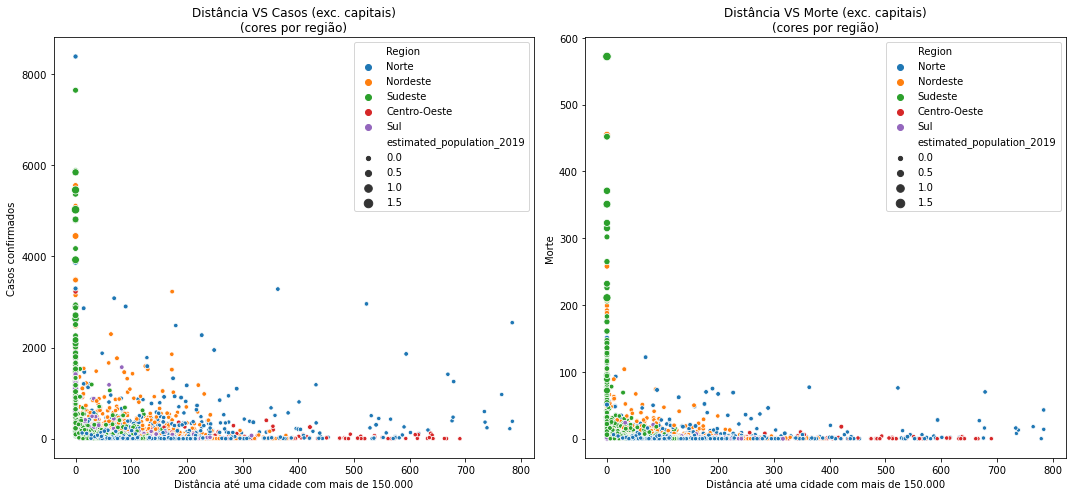

In [31]:
f, axes = plt.subplots(1, 2, figsize=(15, 7))
# cmap = sns.cubehelix_palette(n_colors=50, dark=0, light=.6, as_cmap=True)

sns.scatterplot(data = covid_last_day_exc_capitals, x = "distance_nearest_bigcity", y = "last_available_confirmed", 
                hue = "Region", size="estimated_population_2019", 
                alpha=1, ax=axes[0], legend = "brief")
sns.scatterplot(data = covid_last_day_exc_capitals, x = "distance_nearest_bigcity", y = "last_available_deaths", 
                hue = "Region", size="estimated_population_2019", 
                alpha=1, ax=axes[1], legend = "brief")

axes[0].set(ylabel="Casos confirmados", xlabel="Distância até uma cidade com mais de 150.000", 
            title="Distância VS Casos (exc. capitais)\n(cores por região)")
axes[1].set(ylabel="Morte", xlabel="Distância até uma cidade com mais de 150.000", 
            title="Distância VS Morte (exc. capitais)\n(cores por região)")

plt.tight_layout()
plt.show()

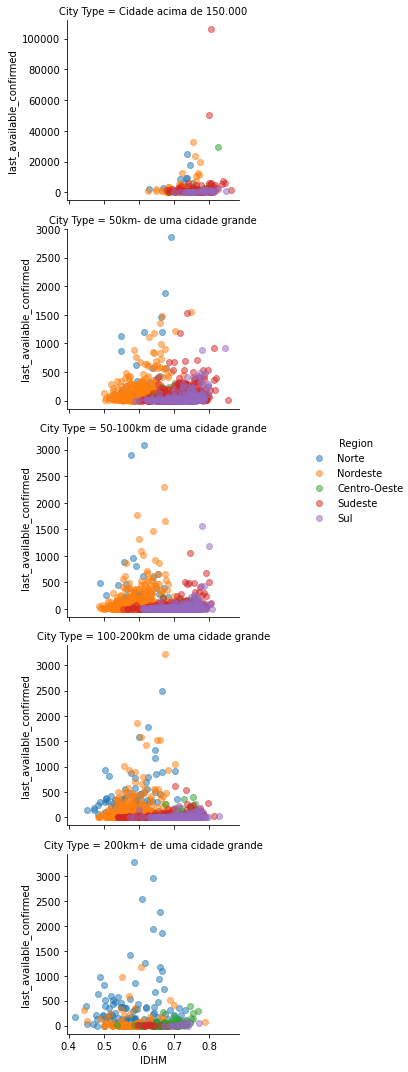

In [29]:
grid = sns.FacetGrid(covid_last_day, row="City Type", hue="Region", sharey=False, row_order=choices)
grid.map(plt.scatter, "IDHM", "last_available_confirmed", alpha=.5)
grid.add_legend(loc='lower center', bbox_to_anchor=(1.12, 0.5), ncol=1)

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)

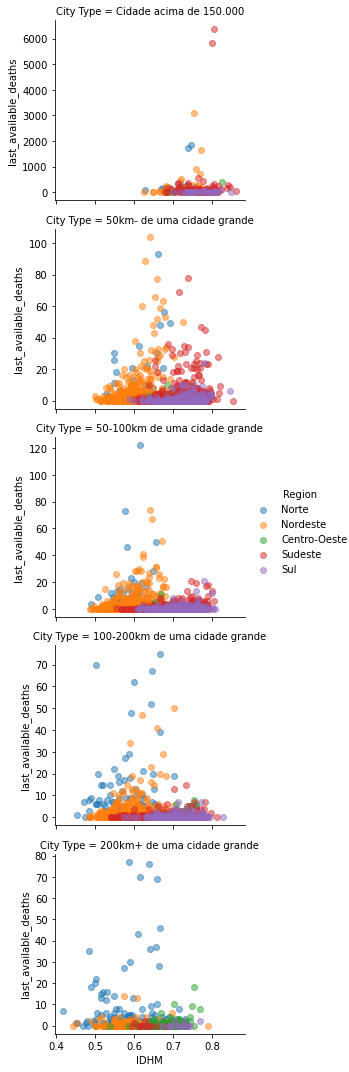

In [12]:
grid = sns.FacetGrid(covid_last_day, row="City Type", hue="Region", sharey=False, row_order=choices)
grid.map(plt.scatter, "IDHM", "last_available_deaths", alpha=.5)
grid.add_legend(loc='center right', bbox_to_anchor=(1.12, 0.5), ncol=1)

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)